# EVALUATION OF FIXED CHAPTERS

In [10]:
import os 
import pandas as pd
import pickle
import json
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [11]:
random.seed(69420)

# Human chapters cleaning

In [15]:
%%time
with open('../data/chapters.pkl', 'rb') as f:
    human_chapters_raw = pickle.load(f)
human_chapters = pd.DataFrame.from_dict(human_chapters_raw, orient='index')
human_chapters = human_chapters[["chapters"]]
human_chapters.reset_index(inplace=True)
human_chapters.rename(columns={'index': 'id'}, inplace=True)
human_chapters.rename(columns={'chapters': 'human'}, inplace=True)
human_chapters.dropna(inplace=True)

CPU times: user 8.03 s, sys: 3.92 s, total: 11.9 s
Wall time: 12.9 s


In [16]:
iteratore = human_chapters["human"]
print(len(iteratore)) 
jason = []

for video in iteratore:
    dict = {}    
    for n, item in enumerate(video):
        title = item["label"]
        dict[f"{n+1}"] = title
    jason.append(dict)
print(len(jason))
    

817076
817076


In [17]:
human_chapters["human_json"] = jason

In [18]:
human_chapters

,id,human,human_json
0,jOiOkFwBpNI,"[{'label': 'You won’t look amazing', 'time': 4...","{'1': 'You won’t look amazing', '2': 'Bad ener..."
1,vBv5G5emgl0,[{'label': 'Sheldon's Financial Situation - Th...,{'1': 'Sheldon's Financial Situation - The Big...
2,IkrXmYjWgIo,"[{'label': 'Introduction', 'time': 0}, {'label...","{'1': 'Introduction', '2': 'Unboxing', '3': 'U..."
3,2rj9fXhUKnI,"[{'label': 'moon sparo - void', 'time': 47}, {...","{'1': 'moon sparo - void', '2': 'moon sparo - ..."
4,C0sdqnGCE2w,"[{'label': 'intro', 'time': 0}, {'label': 'all...","{'1': 'intro', '2': 'allergy shots gone bad', ..."
...,...,...,...
817071,Au6GfZev_kc,[{'label': 'Recording Start - (...after many t...,{'1': 'Recording Start - (...after many techni...
817072,AuTQwyGsMsU,[{'label': '1 Xerox & Freeman - Karina (Remix ...,{'1': '1 Xerox & Freeman - Karina (Remix 1998'...
817073,Auflu6XTrnc,"[{'label': 'Step 1 - Grip', 'time': 136}, {'la...","{'1': 'Step 1 - Grip', '2': 'Step 2- Setup & S..."
817074,AuHNvEwx-4g,"[{'label': 'Intro', 'time': 0}, {'label': 'BTC...","{'1': 'Intro', '2': 'BTC or Fiat pairs explain..."


### The next part, is to collect sentences to feed to the doc2vec model that we wil need to calcualte the cosine similarity

We are sampeling 112000 sentences from all the sentences present in in the human chapters, this is done because we only have 112000 sentences in the in the fixed chapters and we want our doc2vec model to be balanced and trained on the same number of humna mande sentences and machine made sentences. We belive that this will make the model more accurate in our particular use case.

In [19]:
tutteFrasiUmani = []
for vid in human_chapters["human_json"]:
    sent = list(vid.values())
    for broccolo in sent:
        tutteFrasiUmani.append(broccolo)

In [20]:
tutteFrasi = random.sample(tutteFrasiUmani, 112000)
len(tutteFrasi)

112000

# LLAMA chapters cleaning

In [21]:
directory = '../data/resFixed/'
file_names = []
file_contents = []

for file_name in os.listdir(directory):
    file_path = os.path.join(directory, file_name)
    if os.path.isfile(file_path):
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
        file_names.append(file_name[:-5])
        file_contents.append(content)

fixed_chapters = pd.DataFrame({
    'file_name': file_names,
    'content': file_contents
})
fixed_chapters.rename(columns={'file_name': 'id'}, inplace=True)
fixed_chapters.rename(columns={'content': 'fixed'}, inplace=True)


In [22]:
fixed_chapters

,id,fixed
0,tVAiE-pk7aY,"{\n ""1"": ""Error processing this chunk..."",\..."
1,C97vQGjeOXI,"{\n ""1"": ""There's two main options to pcs t..."
2,zRUk0qHDa_Q,"{\n ""1"": ""The lightsaber is the blade is ca..."
3,TkFpcVNiZ_E,"{\n ""1"": ""\""I thought I'd share how to make..."
4,uOpAxzHiKW8,"{\n ""1"": ""The Shaq back pocket belt travel ..."
...,...,...
19309,NoBCYMwQUTQ,"{\n ""1"": ""\""I'll be teaching the shorty a c..."
19310,TynGofurKPM,"{\n ""1"": ""Ligue 1 predictions round 50 Cove..."
19311,FhnX9B0An9g,"{\n ""1"": ""Error processing this chunk..."",\..."
19312,cHasvMSjMFw,"{\n ""1"": ""Stretch wrappers are a great way ..."


In [23]:
cosini = fixed_chapters["fixed"]
lolol = []

for vidd in cosini:
    try:
        parsed_dict = json.loads(vidd)
        lolol.append(parsed_dict)
    except:
        lolol.append(None) 
    
fixed_chapters["fixed_json"] = lolol
fixed_chapters.dropna(inplace=True)
fixed_chapters

,id,fixed,fixed_json
0,tVAiE-pk7aY,"{\n ""1"": ""Error processing this chunk..."",\...","{'1': 'Error processing this chunk...', '2': '..."
1,C97vQGjeOXI,"{\n ""1"": ""There's two main options to pcs t...",{'1': 'There's two main options to pcs to germ...
2,zRUk0qHDa_Q,"{\n ""1"": ""The lightsaber is the blade is ca...",{'1': 'The lightsaber is the blade is capable ...
3,TkFpcVNiZ_E,"{\n ""1"": ""\""I thought I'd share how to make...","{'1': '""I thought I'd share how to make a simp..."
4,uOpAxzHiKW8,"{\n ""1"": ""The Shaq back pocket belt travel ...",{'1': 'The Shaq back pocket belt travel wallet...
...,...,...,...
19309,NoBCYMwQUTQ,"{\n ""1"": ""\""I'll be teaching the shorty a c...","{'1': '""I'll be teaching the shorty a car whic..."
19310,TynGofurKPM,"{\n ""1"": ""Ligue 1 predictions round 50 Cove...",{'1': 'Ligue 1 predictions round 50 Coventry C...
19311,FhnX9B0An9g,"{\n ""1"": ""Error processing this chunk..."",\...","{'1': 'Error processing this chunk...', '2': '..."
19312,cHasvMSjMFw,"{\n ""1"": ""Stretch wrappers are a great way ...",{'1': 'Stretch wrappers are a great way to sav...


In [24]:
for i in range(len(fixed_chapters)):
    if "Error processing this chunk..." in set(fixed_chapters["fixed_json"][i].values()):
        fixed_chapters["fixed_json"][i] = None

In [25]:
fixed_chapters.dropna(inplace=True)

In [26]:
fixed_chapters

,id,fixed,fixed_json
1,C97vQGjeOXI,"{\n ""1"": ""There's two main options to pcs t...",{'1': 'There's two main options to pcs to germ...
2,zRUk0qHDa_Q,"{\n ""1"": ""The lightsaber is the blade is ca...",{'1': 'The lightsaber is the blade is capable ...
3,TkFpcVNiZ_E,"{\n ""1"": ""\""I thought I'd share how to make...","{'1': '""I thought I'd share how to make a simp..."
4,uOpAxzHiKW8,"{\n ""1"": ""The Shaq back pocket belt travel ...",{'1': 'The Shaq back pocket belt travel wallet...
5,FDtApfo_hzY,"{\n ""1"": ""The Showers Pass Utility backpack...",{'1': 'The Showers Pass Utility backpack is a ...
...,...,...,...
19308,OxA81RKqQDo,"{\n ""1"": ""The new Urban Decay Naked honey p...",{'1': 'The new Urban Decay Naked honey palette...
19309,NoBCYMwQUTQ,"{\n ""1"": ""\""I'll be teaching the shorty a c...","{'1': '""I'll be teaching the shorty a car whic..."
19310,TynGofurKPM,"{\n ""1"": ""Ligue 1 predictions round 50 Cove...",{'1': 'Ligue 1 predictions round 50 Coventry C...
19312,cHasvMSjMFw,"{\n ""1"": ""Stretch wrappers are a great way ...",{'1': 'Stretch wrappers are a great way to sav...


In [27]:
for vid in fixed_chapters["fixed_json"]:
    sent = list(vid.values())
    for broccolo in sent:
        tutteFrasi.append(broccolo)

In [28]:
len(tutteFrasi)

224767

# Merge the 2 dataframes

In [29]:
merged_df = pd.merge(fixed_chapters, human_chapters, on='id', how='inner')

In [30]:
merged_final = merged_df[["id", "fixed_json", "human_json"]]

In [31]:
merged_final

,id,fixed_json,human_json
0,C97vQGjeOXI,{'1': 'There's two main options to pcs to germ...,"{'1': 'Into to Military Spouse', '2': 'Tell me..."
1,zRUk0qHDa_Q,{'1': 'The lightsaber is the blade is capable ...,"{'1': 'Intro', '2': 'Programming The Board', '..."
2,TkFpcVNiZ_E,"{'1': '""I thought I'd share how to make a simp...","{'1': 'Introduction', '2': 'Drawing the Heart'..."
3,uOpAxzHiKW8,{'1': 'The Shaq back pocket belt travel wallet...,"{'1': 'Overview', '2': 'Materials, Stitching a..."
4,FDtApfo_hzY,{'1': 'The Showers Pass Utility backpack is a ...,"{'1': 'Backpack Specs', '2': 'Pocket Deep Dive..."
...,...,...,...
14091,OxA81RKqQDo,{'1': 'The new Urban Decay Naked honey palette...,"{'1': 'Quad 1 | Looxi Beauty', '2': 'Quad 2 | ..."
14092,NoBCYMwQUTQ,"{'1': '""I'll be teaching the shorty a car whic...","{'1': 'Fidget Move 1 (Charlier Cut', '2': 'Fid..."
14093,TynGofurKPM,{'1': 'Ligue 1 predictions round 50 Coventry C...,"{'1': 'Blackpool vs Wycombe Wanderers', '2': '..."
14094,cHasvMSjMFw,{'1': 'Stretch wrappers are a great way to sav...,"{'1': 'Intro', '2': 'Manual Stretch Wrappers',..."


# Chapter comparison

## Number of chapters

In [32]:
len_data = []
for i in range(len(merged_final["human_json"])):
    fixed = merged_final["fixed_json"][i]
    human = merged_final["human_json"][i]
    len_diff = np.abs(len(fixed) - len(human))
    len_data.append(len_diff)

In [33]:
mean = sum(len_data)/len(len_data)
mean

3.290649829738933

In [34]:
median = np.median(len_data)
median

3.0

In [35]:
stdev = np.std(len_data)
stdev

3.299879263428242

In [36]:
merged_final.loc[:, "len_diff"] = len_data

/var/folders/j9/w6m91zxs22l58fngjqhl5xm80000gn/T/ipykernel_41432/2542374804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_final.loc[:, "len_diff"] = len_data


In [37]:
merged_final

,id,fixed_json,human_json,len_diff
0,C97vQGjeOXI,{'1': 'There's two main options to pcs to germ...,"{'1': 'Into to Military Spouse', '2': 'Tell me...",10
1,zRUk0qHDa_Q,{'1': 'The lightsaber is the blade is capable ...,"{'1': 'Intro', '2': 'Programming The Board', '...",2
2,TkFpcVNiZ_E,"{'1': '""I thought I'd share how to make a simp...","{'1': 'Introduction', '2': 'Drawing the Heart'...",1
3,uOpAxzHiKW8,{'1': 'The Shaq back pocket belt travel wallet...,"{'1': 'Overview', '2': 'Materials, Stitching a...",2
4,FDtApfo_hzY,{'1': 'The Showers Pass Utility backpack is a ...,"{'1': 'Backpack Specs', '2': 'Pocket Deep Dive...",4
...,...,...,...,...
14091,OxA81RKqQDo,{'1': 'The new Urban Decay Naked honey palette...,"{'1': 'Quad 1 | Looxi Beauty', '2': 'Quad 2 | ...",5
14092,NoBCYMwQUTQ,"{'1': '""I'll be teaching the shorty a car whic...","{'1': 'Fidget Move 1 (Charlier Cut', '2': 'Fid...",5
14093,TynGofurKPM,{'1': 'Ligue 1 predictions round 50 Coventry C...,"{'1': 'Blackpool vs Wycombe Wanderers', '2': '...",3
14094,cHasvMSjMFw,{'1': 'Stretch wrappers are a great way to sav...,"{'1': 'Intro', '2': 'Manual Stretch Wrappers',...",2


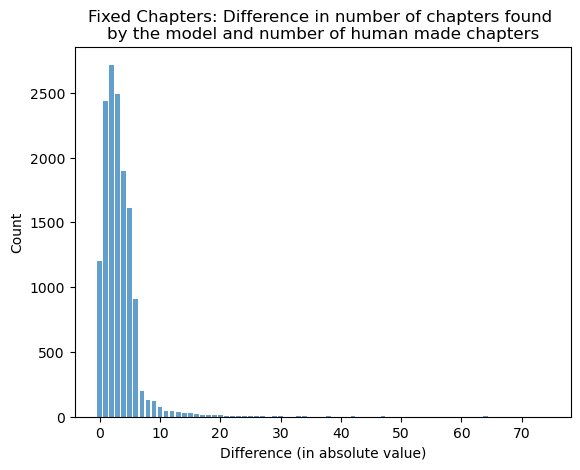

In [39]:
lens = merged_final['len_diff']
value_counts = lens.value_counts().sort_index()

plt.bar(value_counts.index, value_counts.values, alpha=0.7)
plt.xlabel('Difference (in absolute value)')
plt.ylabel('Count')
plt.title('Fixed Chapters: Difference in number of chapters found \nby the model and number of human made chapters')
#plt.show()
plt.savefig("resScore/Fixed chapters distribution.png", dpi = 400)

## Traning doc2vec model

### Traning the model takes about 2 minutes, if you dont want to train it you can simply load it from here:

In [42]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

model_file_path = "doc2vec/Fixed/doc2vec_modelFixed"

# Load the saved Doc2Vec model
model = Doc2Vec.load(model_file_path)

If you load the model please use this to check that it was loaded successfully

In [43]:
if isinstance(model, Doc2Vec):
    print("Model loaded successfully.")

    # Check if the vocabulary is loaded
    if len(model.wv) > 0:
        print("Model vocabulary loaded successfully.")
    else:
        print("Model vocabulary is empty.")
else:
    print("Loaded model is not a Doc2Vec instance.")

Model loaded successfully.
Model vocabulary loaded successfully.


### Train doc2vec model

In [40]:
%%time
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

tagged_data = [TaggedDocument(words=s.split(), tags=[str(i)]) for i, s in enumerate(tutteFrasi)]

vector_size = 100
window_size = 5
min_count = 1
epochs = 20

model = Doc2Vec(vector_size=vector_size, window=window_size, min_count=min_count, epochs=epochs)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

CPU times: user 2min 1s, sys: 13.4 s, total: 2min 14s
Wall time: 1min 29s


In [41]:
# Define the file path where you want to save the trained model
model_file_path = "doc2vec/Fixed/doc2vec_modelFixed"

# Save the trained Doc2Vec model
model.save(model_file_path)

## Cosine Similarity Score

In [29]:
from itertools import combinations_with_replacement

def insert_empties_between(lst, x):
    n = len(lst)
    
    # Generate all ways to distribute x zeros in n+1 positions
    distributions = combinations_with_replacement(range(n+1), x)
    
    results = []
    for distribution in distributions:
        result = []
        elements_iter = iter(lst)
        for pos in range(n):
            for el in distribution:
                if el == pos:
                    result.append('')
            result.append(next(elements_iter))
        for el in distribution:
            if el == n:
                result.append('')
        results.append(result)
            
    return results

In [30]:
def compute_similarity_gen(x, y, verbose = False):
    '''
    x = list of chapters, human
    y = list of chapters, llama
    '''
    def compute_similarity(x, y, min_len):
        
#        print(x)
#        print(y)
        pair_scores = []
        for human_sent, llama_sent in zip(x, y):
            
            # Generate embeddings for sentences
#            print(human_sent.split())
#            print(llama_sent.split())
            human_emb = model.infer_vector(human_sent.split())
            llama_emb = model.infer_vector(llama_sent.split())
#            print(human_emb)
#            print(llama_emb)
        
            # Compute cosine similarity between sentence embeddings
            similarity_score = cosine_similarity([human_emb], [llama_emb])[0][0]
            pair_scores.append(similarity_score)
#            print(pair_scores)
        overall_video_score = sum(pair_scores)/min_len
        return overall_video_score
    
    if len(x) == len(y):
        min_len = len(x)
        return compute_similarity(x,y,min_len)
    if len(x) < len(y):
        min_len = len(x)
        diff = len(y) - len(x)
        similarity = 0
        elem = None
        for el in insert_empties_between(x, diff):
            if compute_similarity(el,y, min_len) > similarity:
                similarity = compute_similarity(el,y, min_len)
                elem = el
        if verbose == True:
            print(similarity, elem, y)
    if len(x) > len(y):
        min_len = len(y)
        diff = len(x) - len(y)
        similarity = 0
        elem = None
        for el in insert_empties_between(y, diff):
            if compute_similarity(x, el, min_len) > similarity:
                similarity = compute_similarity(x, el, min_len)
                elem = el
        if verbose == True:
            print(similarity, x, elem)
        
    return similarity

### Since the calculation of the cosine similarity takes a long time, we saved the "cosine_df" to a csv (FIXED.csv) and later there is an option to load it back in to check out the cosine similarities

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

fixed_json = merged_final["fixed_json"]
human_json = merged_final["human_json"]
diff = merged_final['len_diff'].apply(np.abs)

indeces = list(fixed_json.index)

all_scores = []

for pointer in tqdm(indeces):
    if diff[pointer] <= 4:
        human_d = human_json[pointer]
        fixed_d = fixed_json[pointer]
        human_chap_list = list(human_d.values())
        fixed_chap_list = list(fixed_d.values())
        # Compute embeddings and cosine similarity for each pair of sentences
        all_scores.append(compute_similarity_gen(human_chap_list, fixed_chap_list))

100%|██████████| 14096/14096 [1:37:04<00:00,  2.42it/s]  


In [32]:
np.mean(all_scores)

0.2952209205410764

In [33]:
np.median(all_scores)

0.2907950757071376

In [34]:
cosine_df = merged_final[merged_final["len_diff"] <= 4]
cosine_df.loc[:, "cosine similarity"] = all_scores

/var/folders/j9/w6m91zxs22l58fngjqhl5xm80000gn/T/ipykernel_29965/278484341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cosine_df.loc[:, "cosine similarity"] = all_scores


In [35]:
cosine_df

,id,fixed_json,human_json,len_diff,cosine similarity
1,zRUk0qHDa_Q,{'1': 'The lightsaber is the blade is capable ...,"{'1': 'Intro', '2': 'Programming The Board', '...",2,0.257915
2,TkFpcVNiZ_E,"{'1': '""I thought I'd share how to make a simp...","{'1': 'Introduction', '2': 'Drawing the Heart'...",1,0.312235
3,uOpAxzHiKW8,{'1': 'The Shaq back pocket belt travel wallet...,"{'1': 'Overview', '2': 'Materials, Stitching a...",2,0.410135
4,FDtApfo_hzY,{'1': 'The Showers Pass Utility backpack is a ...,"{'1': 'Backpack Specs', '2': 'Pocket Deep Dive...",4,0.380430
8,HT5t4SoSxis,{'1': 'My overprotective dad is going to fight...,"{'1': 'Fight Teaser', '2': 'Making my sister's...",2,0.359139
...,...,...,...,...,...
14087,j7fkadELAoI,{'1': 'Enterprise Hosting is tailored for high...,"{'1': 'Enterprise WordPress Hosting', '2': 'Wh...",1,0.262413
14088,_7EdUl58gks,{'1': 'I'm terribly excited to find out and be...,"{'1': 'Tom Holland', '2': 'Sebastian Stan', '3...",1,0.406526
14093,TynGofurKPM,{'1': 'Ligue 1 predictions round 50 Coventry C...,"{'1': 'Blackpool vs Wycombe Wanderers', '2': '...",3,0.363208
14094,cHasvMSjMFw,{'1': 'Stretch wrappers are a great way to sav...,"{'1': 'Intro', '2': 'Manual Stretch Wrappers',...",2,0.453151


In [36]:
cosine_df.to_csv("resScore/FIXED.csv")

## Here is the cell to load back in the cosine similarities

In [44]:
cosine_df = pd.read_csv("resScore/FIXED.csv")

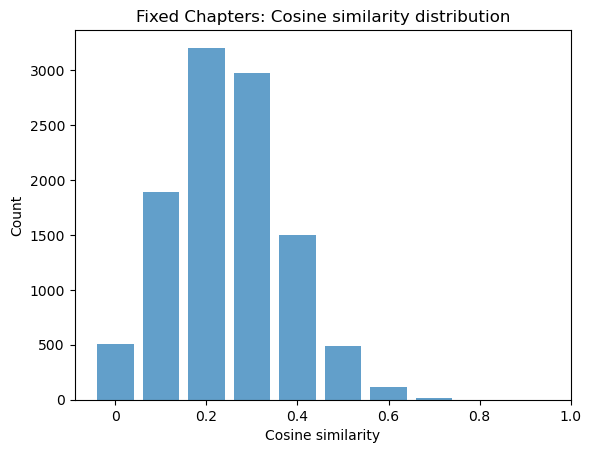

In [46]:
lens = cosine_df["cosine similarity"]

# Define the bins
bins = np.arange(0, 1.1, 0.1)  # Create bins from 0 to 1 with a width of 0.1

# Bin the data
binned_data = pd.cut(lens, bins=bins, include_lowest=True)

# Count the values in each bin
value_counts = binned_data.value_counts().sort_index()

# Plot the binned data
plt.bar(value_counts.index.astype(str), value_counts.values, alpha=0.7)

# Define the custom x-axis labels
x_labels = ['[0.0, 0.1]', '(0.1, 0.2]', '(0.2, 0.3]', '(0.3, 0.4]', '(0.4, 0.5]', 
            '(0.5, 0.6]', '(0.6, 0.7]', '(0.7, 0.8]', '(0.8, 0.9]', '(0.9, 1.0]']
x_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Get the actual positions of these labels in the bins
bin_positions = [0, 2, 4, 6, 8, 10]  # Adjust these positions if necessary

plt.xticks(bin_positions, x_ticks)

plt.xlabel('Cosine similarity')
plt.ylabel('Count')
plt.title('Fixed Chapters: Cosine similarity distribution')

# Save the plot
plt.savefig("resScore/Fixed chapters cosine.png", dpi=400)